In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from boxplots import *
#from confusion_matrix import *
#from count_plots import *
from numpy import average
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.metrics import rand_score, adjusted_rand_score, mutual_info_score, adjusted_mutual_info_score

import seaborn as sns


In [5]:
data = pd.read_csv('output_varplus.csv')
data.columns


Index(['Unnamed: 0', 'bhid', 'from', 'to', 'x', 'y', 'z', 'al2o3_gl', 'cao_gl',
       'fe_gl', 'mgo_gl', 'mn_gl', 'p_gl', 'sio2_gl', 'tio2_gl', 'ppc_gl',
       'lito', 'lito_eval', 'lito_ds', 'lito_km', 'lito_ag'],
      dtype='object')

In [6]:
var = ['al2o3_gl', 'cao_gl', 'fe_gl', 'mgo_gl', 'mn_gl', 'p_gl', 'ppc_gl', 'sio2_gl']
holes = ['bhid']
cat_var = ['lito_ds', 'lito_km', 'lito_ag']
coord = ['x', 'y', 'z']
assay = ['from', 'to']
var_std = ['al2o3_gl_std', 'cao_gl_std', 'fe_gl_std', 'mgo_gl_std', 'mn_gl_std', 'p_gl_std', 'ppc_gl_std', 'sio2_gl_std']

In [4]:
def boxplots(data, varlist, lito):
    
    dict_colors1 = {'HM':'red', 'IR':'orangered', 'IC':'mediumvioletred', 'IM':'aqua', 'IG':'lime', 'IS':'gold'}

    fig, axes = plt.subplots(2, 4, figsize=(20,10))
    axes = axes.flatten()
    iax = 0
    for ax, var, title in zip(axes, varlist, varlist):
        #ax.boxplot()
        sns.boxplot(y=data[var], x=data[lito].sort_values(ascending=True), ax=ax, palette=dict_colors1, fliersize=2, linewidth=1)
        #sns.violinplot(y=data[var], x=data[lito].sort_values(ascending=True), ax=ax, palette=dict_colors1, fliersize=2, linewidth=1)
        ax.set_ylabel('')
        ax.set_xlabel(var, size=12)
        #ax.set
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(12)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(12)
    plt.suptitle(f'{lito}')
    plt.savefig(f'boxplots_{lito}.png') 

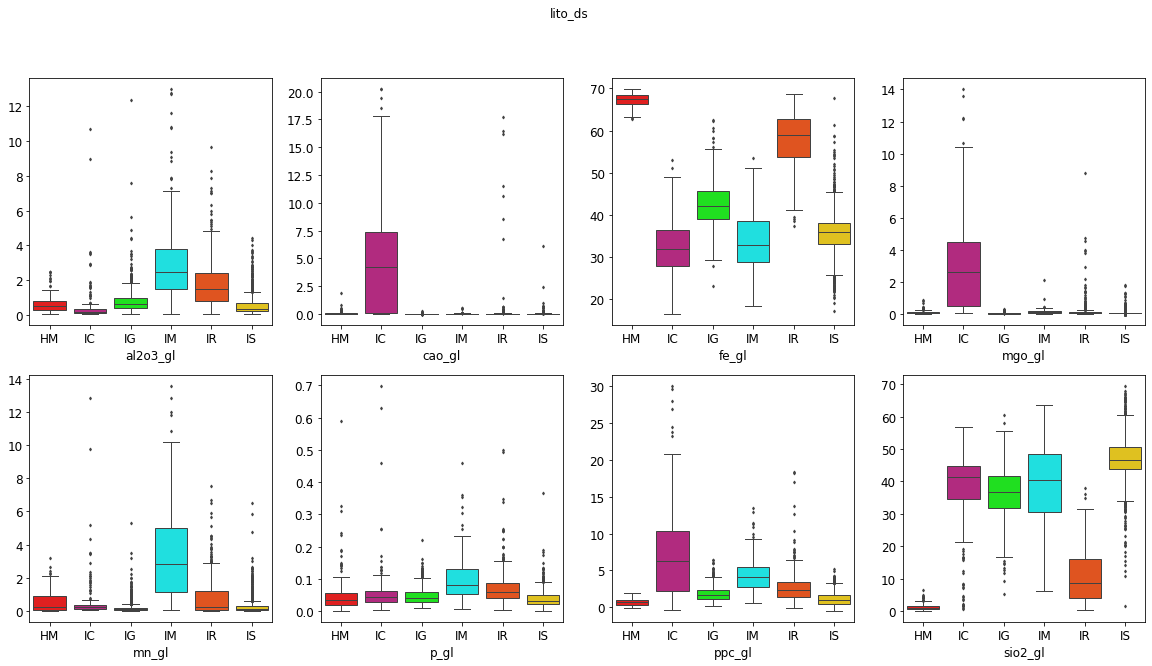

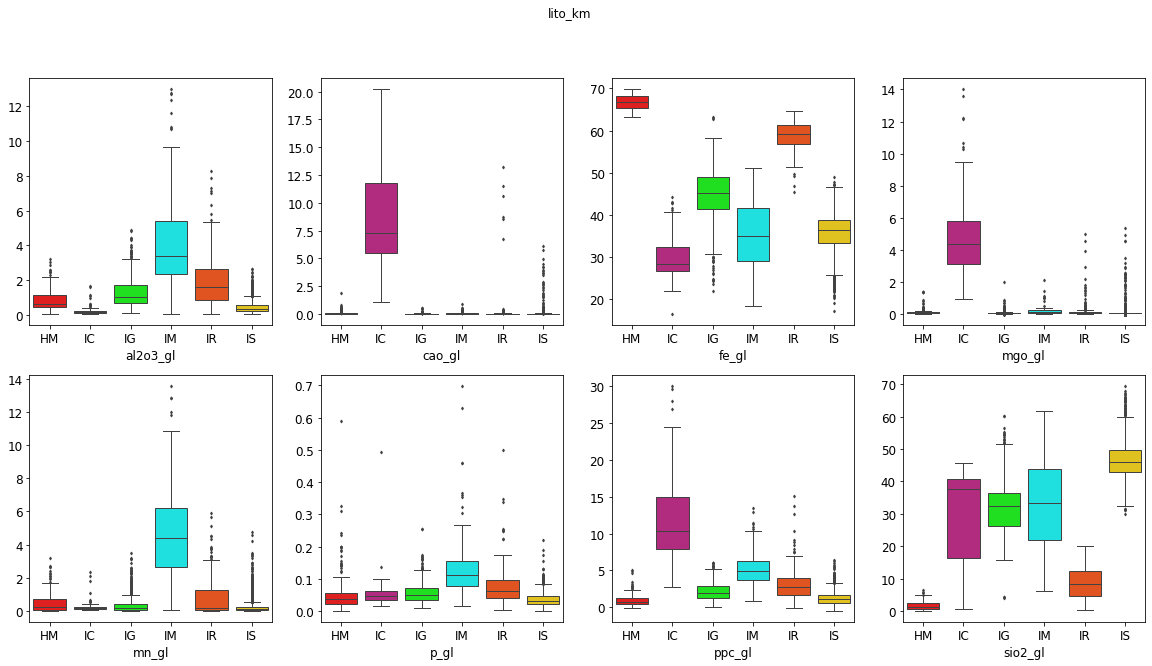

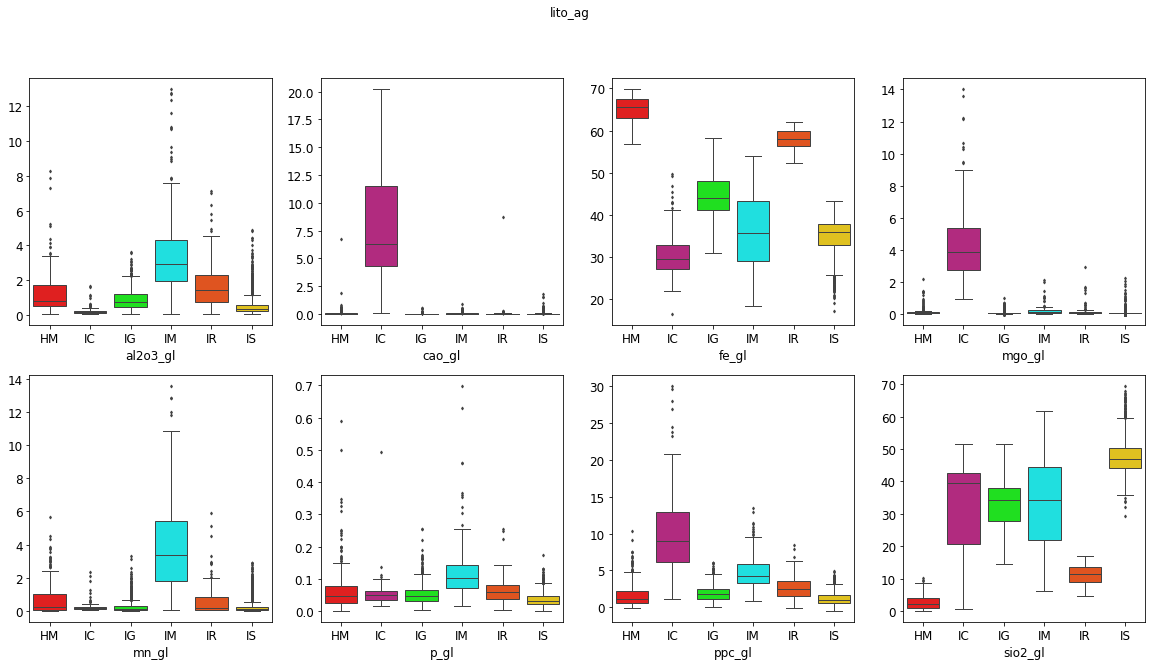

In [5]:
for cl in cat_var:
    boxplots(data, var, cl)

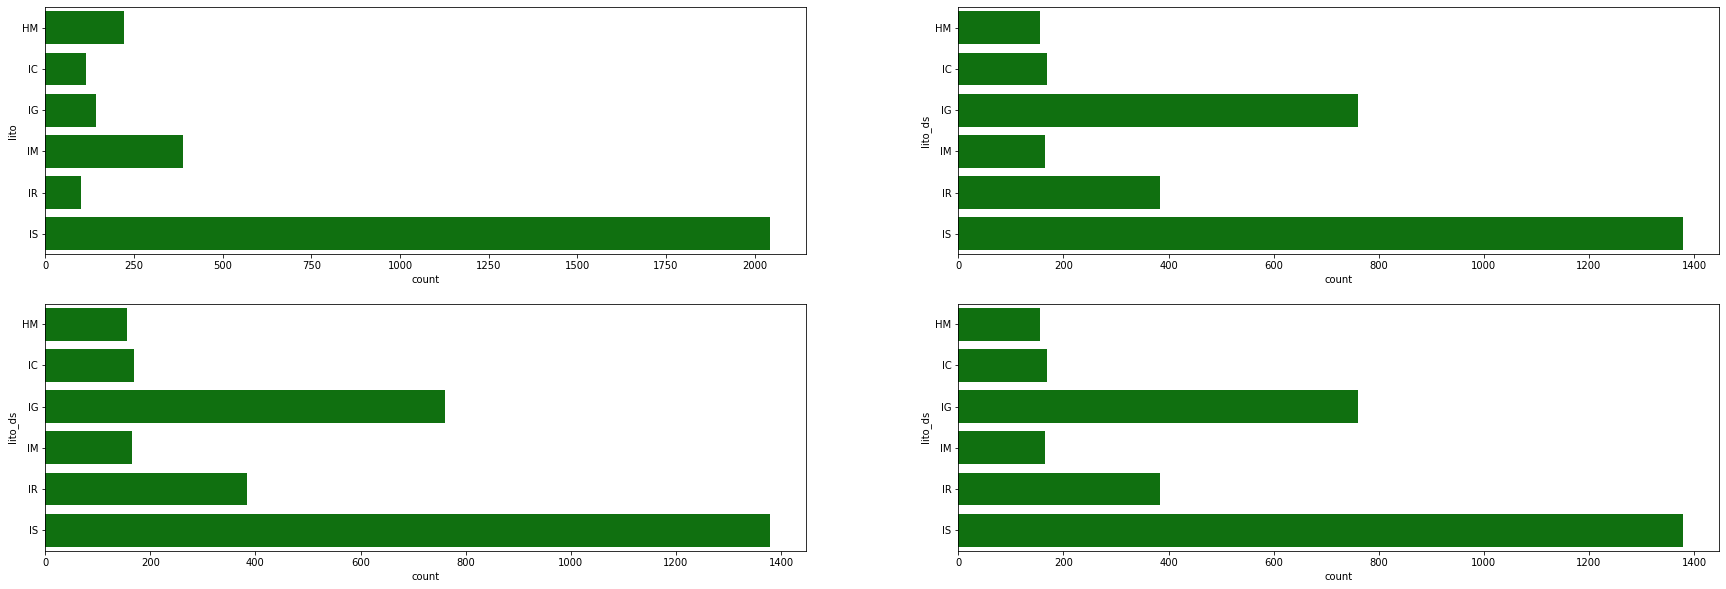

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(20,5))
    
sns.countplot(y=data['lito'].sort_values(ascending=True), color='green', ax=ax[0][0])
sns.countplot(y=data['lito_ds'].sort_values(ascending=True), color='green', ax=ax[1][0])
sns.countplot(y=data['lito_ds'].sort_values(ascending=True), color='green', ax=ax[1][1])
sns.countplot(y=data['lito_ds'].sort_values(ascending=True), color='green', ax=ax[0][1])
fig.set_size_inches(30,10)

plt.show()

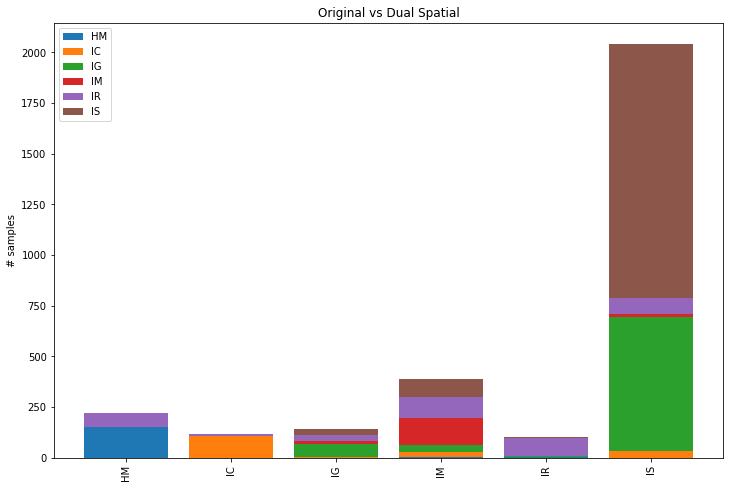

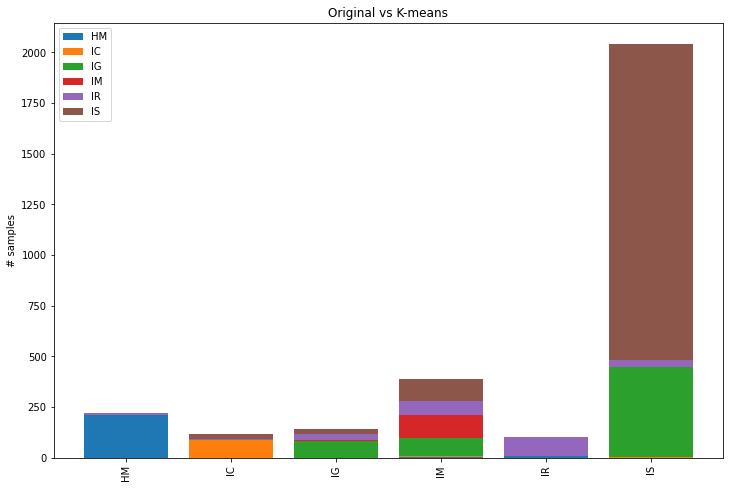

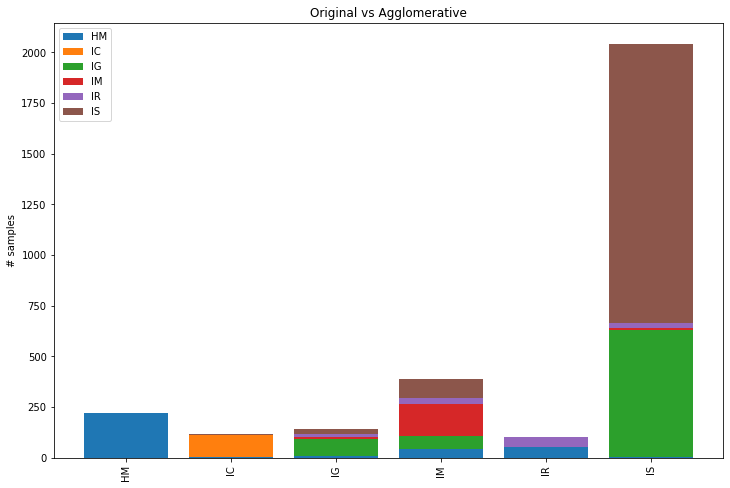

In [7]:
from cat1_in_cat2 import *

cat1_in_cat2(data['lito'], data['lito_ds'], 'Original vs Dual Spatial', 'cat1cat2_lito_ds.png')
cat1_in_cat2(data['lito'], data['lito_km'], 'Original vs K-means', 'cat1cat2_lito_km.png')
cat1_in_cat2(data['lito'], data['lito_ag'], 'Original vs Agglomerative', 'cat1cat2_lito_ag.png')


# Multiclass Confusion Matrix

Multiclass Confusion Matrix KMeans
              precision    recall  f1-score   support

          HM       0.95      0.95      0.95       221
          IC       0.98      0.73      0.84       116
          IG       0.13      0.57      0.21       142
          IM       0.90      0.29      0.44       387
          IR       0.39      0.92      0.55       102
          IS       0.91      0.76      0.83      2043

    accuracy                           0.71      3011
   macro avg       0.71      0.71      0.64      3011
weighted avg       0.86      0.71      0.75      3011

Multiclass Confusion Matrix Agglomerative
               precision    recall  f1-score   support

          HM       0.67      0.99      0.80       221
          IC       0.96      0.96      0.96       116
          IG       0.11      0.59      0.18       142
          IM       0.88      0.40      0.55       387
          IR       0.41      0.46      0.43       102
          IS       0.92      0.67      0.78      2043


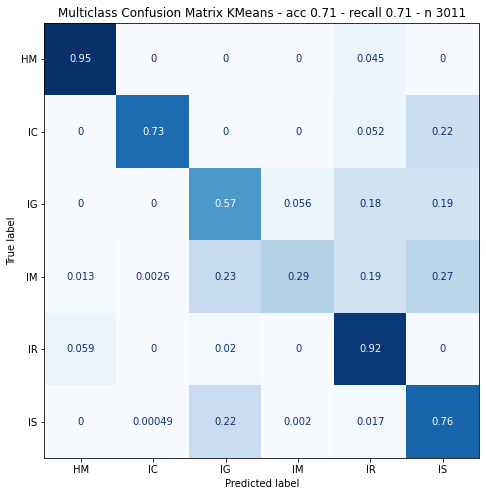

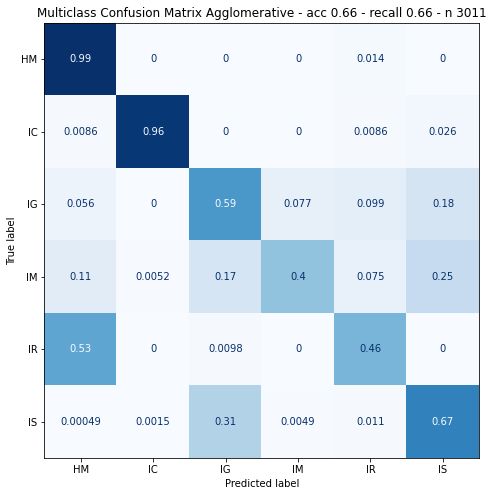

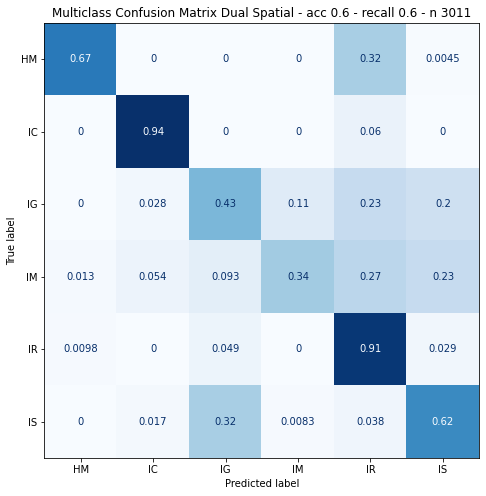

In [8]:
y_true = data['lito'].values

y_predicted_km = data['lito_km']
y_predicted_ds = data['lito_ds']
y_predicted_ag = data['lito_ag']

labels = np.unique(data['lito'])

from confusion_matrix import *

confusion_matrix_plot(labels, y_true, y_predicted_km, 'Multiclass Confusion Matrix KMeans', 'Cnf_Matrix_KMeans.png')

print('Multiclass Confusion Matrix KMeans\n{}'.format(classification_report(y_true, y_predicted_km, target_names=np.unique(data['lito']))))

confusion_matrix_plot(labels, y_true, y_predicted_ag, 'Multiclass Confusion Matrix Agglomerative', 'Cnf_Matrix_Agg.png')

print('Multiclass Confusion Matrix Agglomerative\n {}'.format(classification_report(y_true, y_predicted_ag, target_names=np.unique(data['lito']))))

confusion_matrix_plot(labels, y_true, y_predicted_ds, 'Multiclass Confusion Matrix Dual Spatial', 'Cnf_Matrix_DS.png')

print('Multiclass Confusion Matrix Dual Spatial\n {} '.format(classification_report(y_true, y_predicted_ds, target_names=np.unique(data['lito']))))



In [9]:
metrics = pd.read_csv('cluster_metrics.csv')
performance = pd.read_csv('performance_metrics.csv')

len(metrics)

11

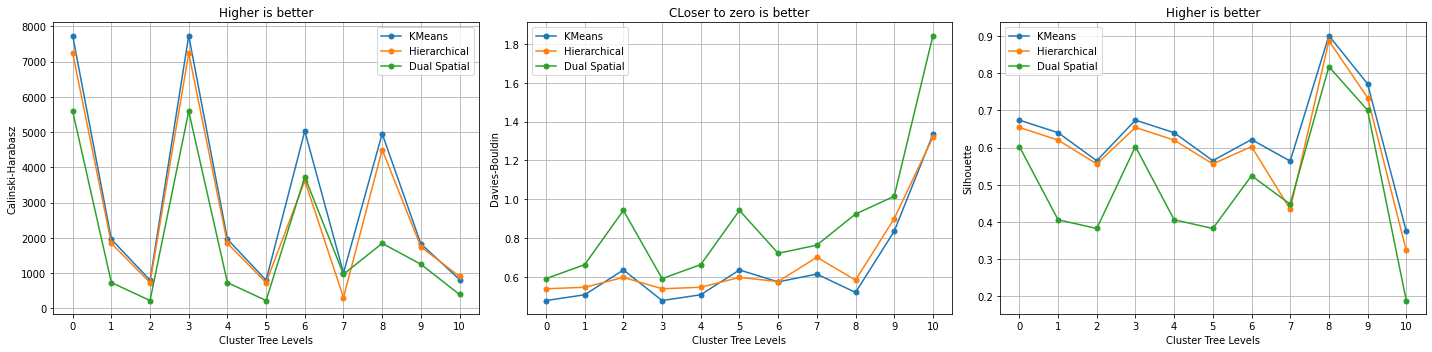

In [10]:
x = [i for i in range(0,len(metrics))]
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].set_title('Higher is better')
axs[0].set_ylabel('Calinski-Harabasz')
axs[0].set_xlabel('Cluster Tree Levels')
axs[0].set_xticks(x)
axs[0].plot(x, metrics['calinszki-ha-km'], label='KMeans', marker='o', markersize=5)
axs[0].plot(x, metrics['calinszki-ha-ag'], label='Hierarchical', marker='o', markersize=5)
axs[0].plot(x, metrics['calinszki-ha-ds'], label='Dual Spatial', marker='o', markersize=5)


axs[0].grid()
axs[0].legend()

axs[1].set_title('CLoser to zero is better')
axs[1].set_ylabel('Davies-Bouldin')
axs[1].set_xlabel('Cluster Tree Levels')
axs[1].set_xticks(x)
axs[1].plot(x, metrics['davis-boudin-km'], label='KMeans', marker='o', markersize=5)
axs[1].plot(x, metrics['davis-boudin-ag'], label='Hierarchical', marker='o', markersize=5)
axs[1].plot(x, metrics['davis-boudin-ds'], label='Dual Spatial', marker='o', markersize=5)
axs[1].grid()
axs[1].legend()
    

axs[2].set_title('Higher is better')
axs[2].set_ylabel('Silhouette')
axs[2].set_xlabel('Cluster Tree Levels')
axs[2].set_xticks(x)
axs[2].plot(x, metrics['sillhoutes-km'], label='KMeans', marker='o', markersize=5)
axs[2].plot(x, metrics['sillhoutes-ag'], label='Hierarchical', marker='o', markersize=5)
axs[2].plot(x, metrics['sillhoutes-ds'], label='Dual Spatial', marker='o', markersize=5)
axs[2].grid()
axs[2].legend()


plt.tight_layout()

In [8]:


import spatialcluster as sp
h_km = []


nn = 30
search = [0,0,0,200,200,50]
ntake = 20
mvar = data[['al2o3_gl', 'cao_gl', 'fe_gl', 'mgo_gl', 'mn_gl', 'p_gl', 'ppc_gl', 'sio2_gl']].values
coord = data[['x','y','z']].values

h_km = sp.cluster_metrics_single(mvdata=mvar, locations=coord, clusdefs=data['lito_km'].values, nnears=nn, searchparams= search)


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type array(pyobject, 1d, C)[0m
[0m[1mDuring: typing of argument at c:\Users\Dell\anaconda3\lib\site-packages\spatialcluster\clustermetrics.py (78)[0m
[1m
File "c:\Users\Dell\anaconda3\lib\site-packages\spatialcluster\clustermetrics.py", line 78:[0m
[1mdef tdiff_wcss(ucats, categories, mvdata):
    <source elided>
    """
[1m    _, nvar = mvdata.shape
[0m    [1m^[0m[0m


In [ ]:
hasattr(mvar, 'values')

False

In [ ]:
_, nvar = mvar.shape

In [ ]:
_, a = [1,2,3]

ValueError: too many values to unpack (expected 2)

In [ ]:
data['lito_km'].values

array(['IR', 'IR', 'IR', ..., 'IS', 'IS', 'IS'], dtype=object)

In [ ]:
mvar.shape

(3011, 8)